This dataset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dataset offers a wealth of features beyond what is typically available in similar datasets. It provides insights into each song's attributes, popularity, and presence on various music platforms. The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features.

In [11]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Load the dataset
df = pd.read_csv('/content/spotify-2023.csv', encoding='latin-1')

Music Analysis:

Explore Audio Features:

1.   Use descriptive statistics to understand the distribution of audio features such as danceability, energy, valence, tempo, etc.
2.   Visualize these features across different genres or time periods to identify patterns.

Correlation Analysis:

1.   Investigate correlations between audio features. For example, see if there's a correlation between danceability and energy.
2.   Determine which features contribute most to a song's popularity.




In [13]:
# Display the first few rows of the dataset to understand its structure
print(df.head())

                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703               

In [14]:
# Summary statistics of numeric columns
print(df.describe())

       artist_count  released_year  released_month  released_day  \
count    953.000000     953.000000      953.000000    953.000000   
mean       1.556139    2018.238195        6.033578     13.930745   
std        0.893044      11.116218        3.566435      9.201949   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
count            953.000000         953.000000          953.000000   
mean            5200.124869          12.009444           67.812172   
std             7897.608990          19.575992           86.441493   
min               31.000000           0.000000            0.000000   
25%              875.000000          

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


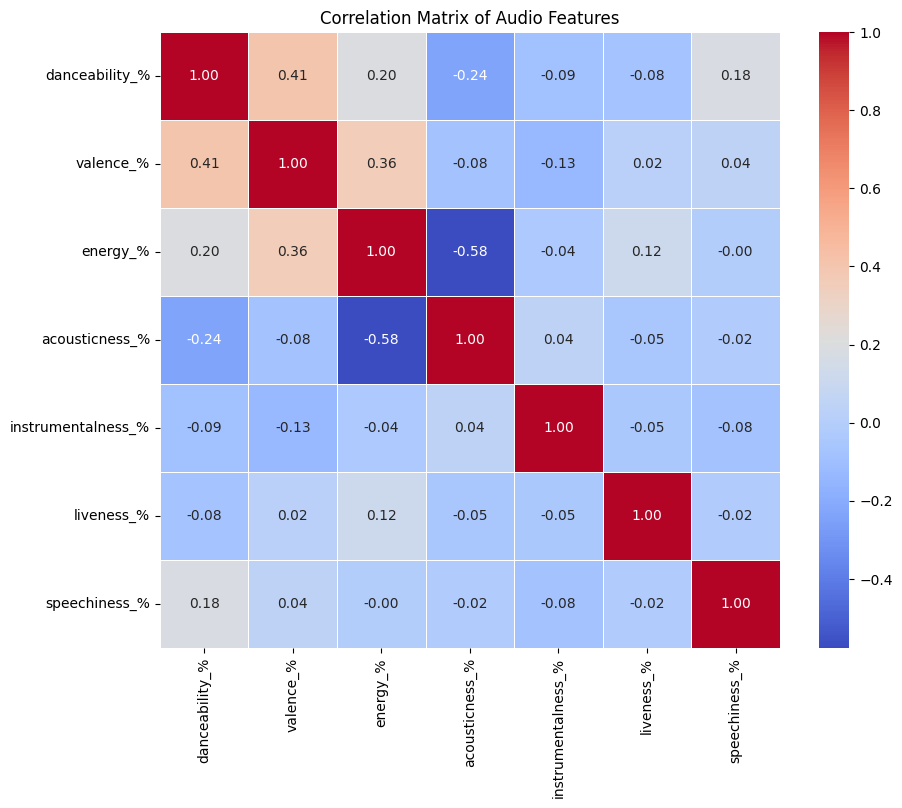

In [15]:
# Display the column names to check for case sensitivity and extra spaces
print(df.columns)

# Clean and strip any extra spaces in column names
df.columns = df.columns.str.strip().str.lower()

# Check for the correct column names with percentage symbols
correct_column_names = [col for col in df.columns if '%' in col]

# Correlation matrix for audio features with correct column names
correlation_matrix = df[correct_column_names].corr()

# Heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Audio Features')
plt.show()

Platform Comparison:

Popularity Metrics:


1.   Collect and compare popularity metrics (stream counts, chart positions) across different platforms (Spotify, Apple Music, Deezer).
2.   Identify any discrepancies in popularity between platforms.

User Engagement:

1.   Analyze user engagement metrics such as likes, shares, and playlists inclusion on each platform.
2.   Look for patterns in user interactions with songs.

       in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
count            953.000000         953.000000          953.000000   
mean            5200.124869          12.009444           67.812172   
std             7897.608990          19.575992           86.441493   
min               31.000000           0.000000            0.000000   
25%              875.000000           0.000000           13.000000   
50%             2224.000000           3.000000           34.000000   
75%             5542.000000          16.000000           88.000000   
max            52898.000000         147.000000          672.000000   

       in_apple_charts  in_deezer_charts  
count       953.000000        953.000000  
mean         51.908709          2.666317  
std          50.630241          6.035599  
min           0.000000          0.000000  
25%           7.000000          0.000000  
50%          38.000000          0.000000  
75%          87.000000          2.000000  
max         275.000000   

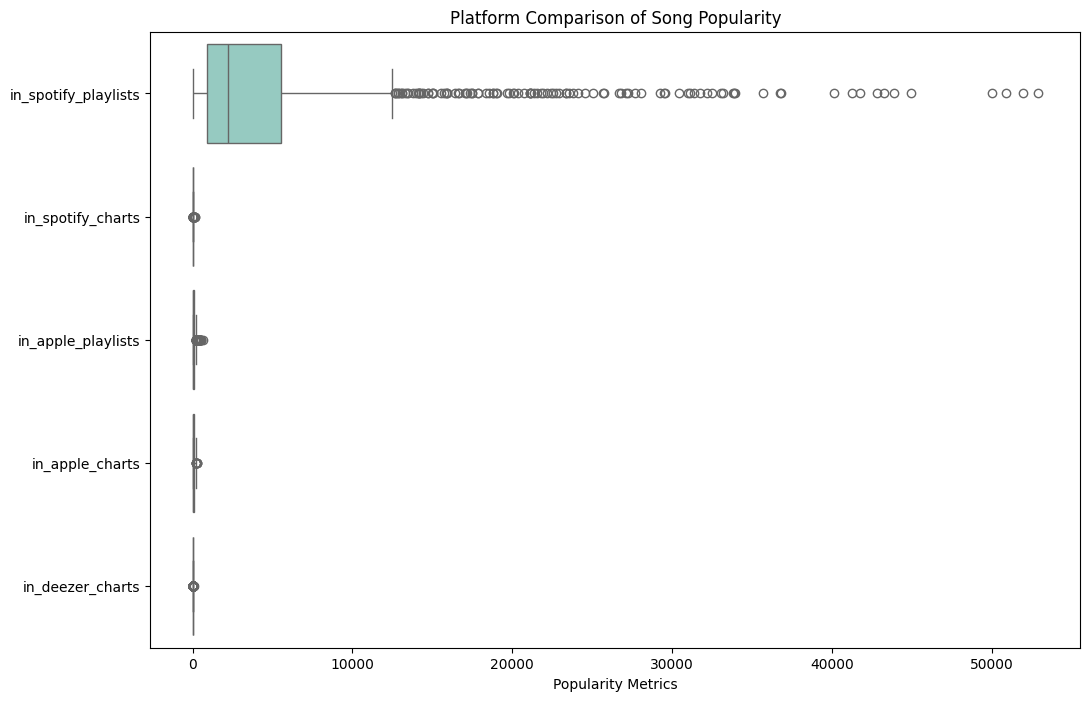

In [16]:
# Platform Comparison

# Select relevant columns for platform comparison
platform_columns = ['in_spotify_playlists', 'in_spotify_charts', 'streams',
                    'in_apple_playlists', 'in_apple_charts',
                    'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']

# Display summary statistics for the selected columns
platform_summary = df[platform_columns].describe()
print(platform_summary)

# Plot platform comparison
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[platform_columns], orient='h', palette='Set3')
plt.title('Platform Comparison of Song Popularity')
plt.xlabel('Popularity Metrics')
plt.show()

       in_spotify_playlists  in_apple_playlists
count            953.000000          953.000000
mean            5200.124869           67.812172
std             7897.608990           86.441493
min               31.000000            0.000000
25%              875.000000           13.000000
50%             2224.000000           34.000000
75%             5542.000000           88.000000
max            52898.000000          672.000000


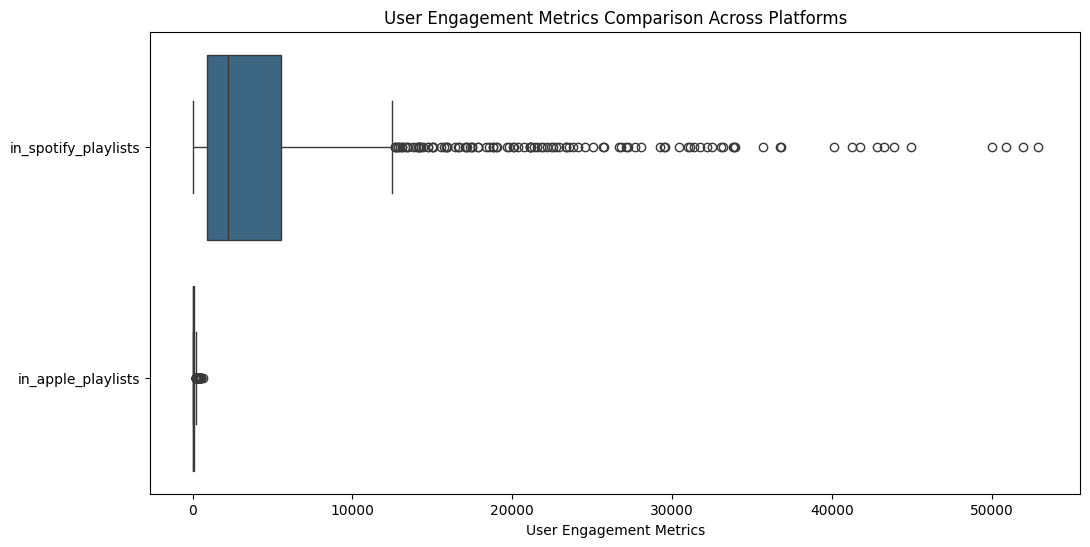

In [17]:
# Additional platform-specific engagement metrics
engagement_columns = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']

# Display summary statistics for the selected engagement columns
engagement_summary = df[engagement_columns].describe()
print(engagement_summary)

# Plot engagement metrics comparison
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[engagement_columns], orient='h', palette='viridis')
plt.title('User Engagement Metrics Comparison Across Platforms')
plt.xlabel('User Engagement Metrics')
plt.show()

Artist Impact:

Artist Attributes:

1.   Explore the relationship between artist attributes (genre, popularity, previous hits) and a song's success.
2.   Identify if certain artists consistently produce more successful songs.

Collaboration Analysis:

1.   Investigate the impact of collaborations on a song's success.
2.   Determine if certain artist pairings are particularly successful.

       artist_count
count    953.000000
mean       1.556139
std        0.893044
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        8.000000


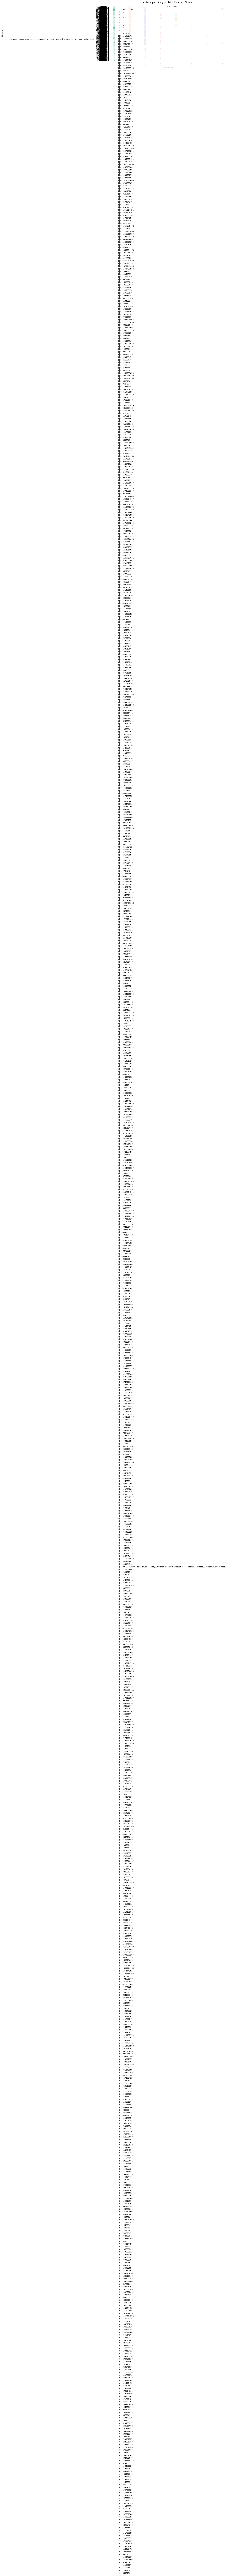

In [18]:
# Artist Impact Analysis

# Select relevant columns for artist impact analysis
artist_columns = ['artist(s)_name', 'artist_count', 'streams']

# Display summary statistics for artist-related columns
artist_summary = df[artist_columns].describe()
print(artist_summary)

# Plot artist impact metrics
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='artist_count', y='streams', hue='artist_count', palette='Set2', size='streams', sizes=(20, 200))
plt.title('Artist Impact Analysis: Artist Count vs. Streams')
plt.xlabel('Artist Count')
plt.ylabel('Streams')
plt.legend(title='Artist Count')
plt.show()

Temporal Trends:

Time Series Analysis:

1.   Create time series plots for audio features and popularity metrics to observe trends over time.
2.   Identify any significant shifts or patterns in music attributes and preferences.

Release Day/Season Analysis:

1.   Analyze if there's a correlation between the day or season a song is released and its success.

In [19]:
# Temporal Trends Analysis

# Convert the 'released_year' and 'released_month' columns to datetime
df['release_date'] = pd.to_datetime(df['released_year'].astype(str) + '-' + df['released_month'].astype(str) + '-01')

# Display the first few rows of the dataset with the new 'release_date' column
print(df[['released_year', 'released_month', 'release_date']].head())

   released_year  released_month release_date
0           2023               7   2023-07-01
1           2023               3   2023-03-01
2           2023               6   2023-06-01
3           2019               8   2019-08-01
4           2023               5   2023-05-01


In [20]:
# Print the columns in the DataFrame
print(df.columns)


Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'release_date'],
      dtype='object')


Cross-Platform Presence:

Presence on Multiple Platforms:


1.   Examine how songs perform across different streaming services.
2.   Identify if certain songs are more popular on specific platforms.

Conversion Analysis:

1.   Investigate if a song's success on one platform leads to increased popularity on other platforms.
2.   Explore any cross-platform synergies.





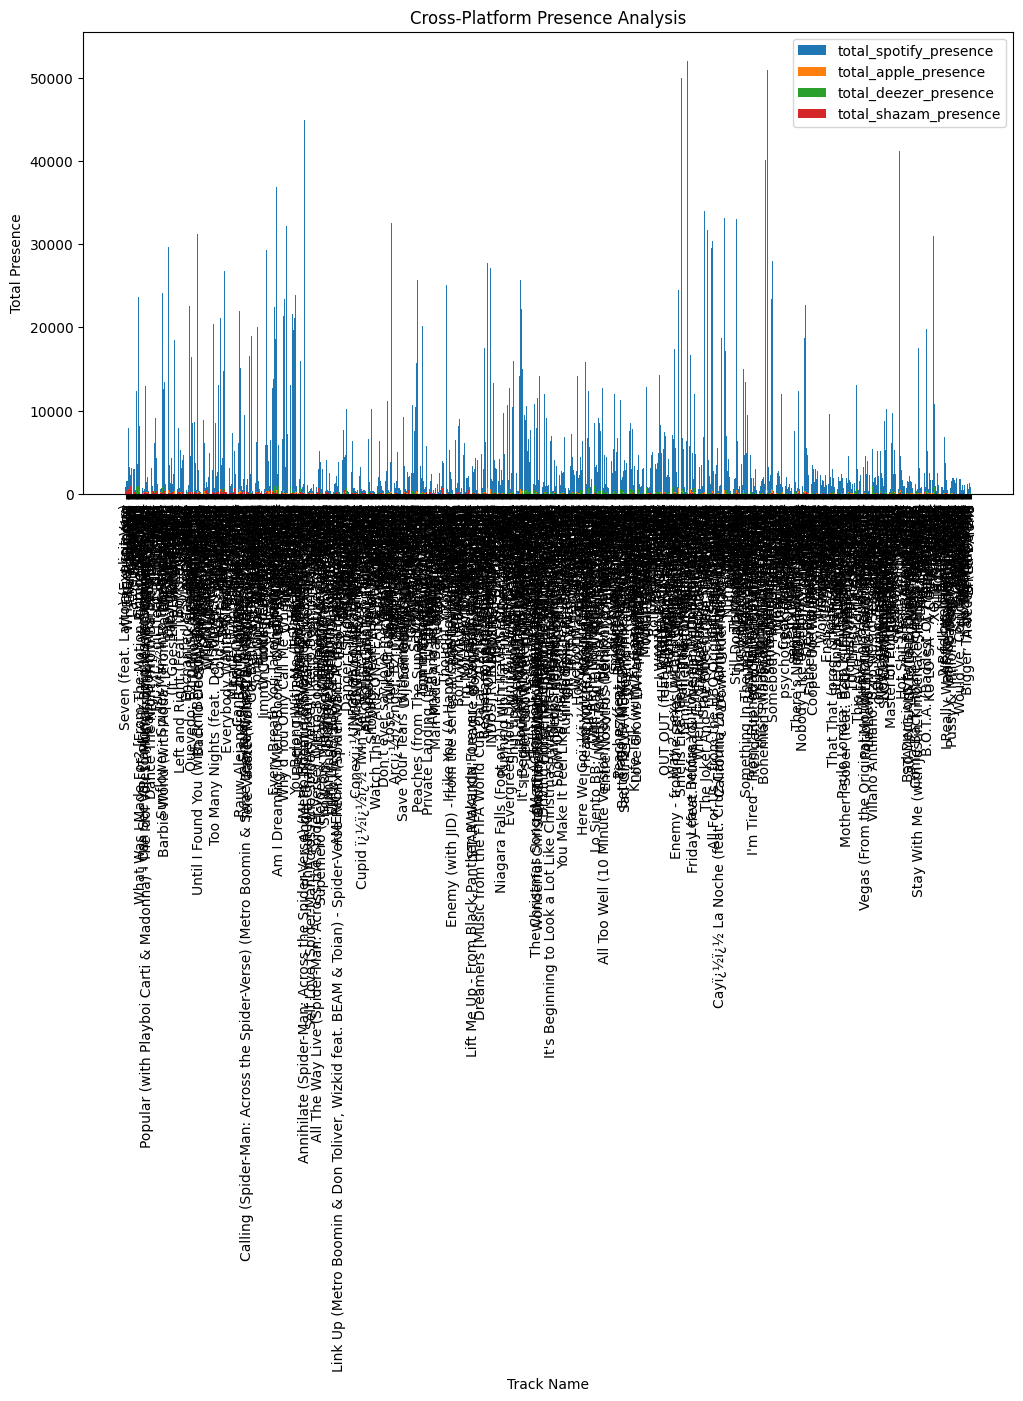

In [24]:
# Select relevant columns for cross-platform presence analysis
platform_columns = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts',
                    'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']

# Create a DataFrame for cross-platform presence analysis
df_platform = df[platform_columns]

# Convert columns to numeric
df_platform = df_platform.apply(pd.to_numeric, errors='coerce')

# Calculate the total presence for each platform
df_platform['total_spotify_presence'] = df_platform['in_spotify_playlists'] + df_platform['in_spotify_charts']
df_platform['total_apple_presence'] = df_platform['in_apple_playlists'] + df_platform['in_apple_charts']
df_platform['total_deezer_presence'] = df_platform['in_deezer_playlists'] + df_platform['in_deezer_charts']
df_platform['total_shazam_presence'] = df_platform['in_shazam_charts']

# Plot the total presence for each platform
plt.figure(figsize=(12, 6))
platform_columns_total = ['total_spotify_presence', 'total_apple_presence', 'total_deezer_presence', 'total_shazam_presence']
for column in platform_columns_total:
    plt.bar(df['track_name'], df_platform[column], label=column)

# Set plot title and labels
plt.title('Cross-Platform Presence Analysis')
plt.xlabel('Track Name')
plt.ylabel('Total Presence')
plt.legend()
plt.xticks(rotation=90)
plt.show()